# Prétraitement des images 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
from os import listdir
from sklearn import preprocessing
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Model

## Import du dataset

In [53]:
path = "./Images_redim/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))
list_photos[0]

1050


'aa68675f50a0551b8dadb954017a50a1.jpg'

In [54]:
# Chargement du dataframe avec l'id du produit et sa catégorie
df = pd.read_csv('cleaned.csv')
df.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [55]:
# définir une fonction lambda pour extraire la catégorie principale
extract_category = lambda x: x.split(">>")[0].strip().strip(']["')

# appliquer la fonction à la colonne 'product_category_tree' du DataFrame
df["label_name"] = df['product_category_tree'].apply(extract_category)
df["label_name"][0]

'Home Furnishing'

In [56]:
label_encoder = preprocessing.LabelEncoder()
label_encoder .fit(df["label_name"])
df['category']=label_encoder.transform(df["label_name"])
df['category'][0:3]

0    4
1    0
2    0
Name: category, dtype: int64

In [57]:
df['filename'] = df.uniq_id + '.jpg'
df.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,label_name,category,filename
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Home Furnishing,4,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Baby Care,0,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Baby Care,0,64d5d4a258243731dc7bbb1eef49ad74.jpg


In [58]:
df.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'label_name',
       'category', 'filename'],
      dtype='object')

In [59]:
df_image = df[['filename', 'category', 'label_name']].copy()
df_image

,filename,category,label_name
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,0,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,0,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,4,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,4,Home Furnishing
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,0,Baby Care
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,0,Baby Care
1047,5912e037d12774bb73a2048f35a00009.jpg,0,Baby Care
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,0,Baby Care


Text(0.5, 1.0, 'Data Distribution')

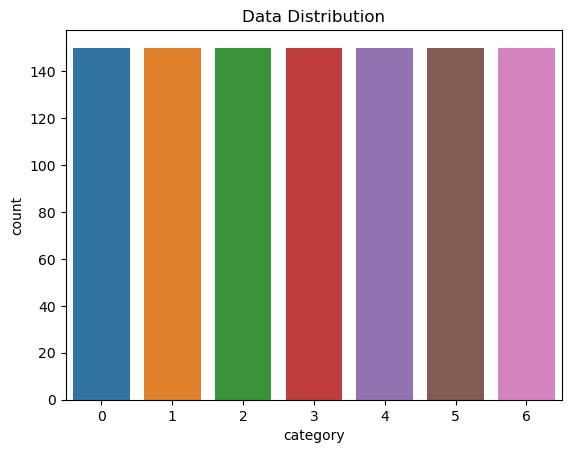

In [60]:
sns.countplot(x='category',data=df_image).set_title("Data Distribution")

In [63]:
# Chargement du modèle pré-entrainé VGG16
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(280, 280, 3))

In [70]:
# Extraction des features des images
def extract_features(filename):
    img = load_img(path+filename, target_size=(280, 280))
    img_array = img_to_array(img)
    img_array = img_array.reshape((1, img_array.shape[0], img_array.shape[1], img_array.shape[2]))
    img_array = vgg16_model.predict(img_array)
    return img_array.flatten()

In [72]:
features = []
for filename in df['filename']:
    features.append(extract_features(filename))

1/1 [==============================] - 1s 686ms/step


1/1 [==============================] - 1s 705ms/step


1/1 [==============================] - 1s 677ms/step


1/1 [==============================] - 1s 687ms/step


1/1 [==============================] - 1s 692ms/step


1/1 [==============================] - 1s 678ms/step


1/1 [==============================] - 1s 682ms/step


In [73]:
features[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [74]:
# Ajout des features au dataframe
df_features = pd.DataFrame(np.array(features))
df_features.columns = ['feature_' + str(i) for i in range(df_features.shape[1])]
df_with_features = pd.concat([df_image, df_features], axis=1)

In [77]:
df_features

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_32758,feature_32759,feature_32760,feature_32761,feature_32762,feature_32763,feature_32764,feature_32765,feature_32766,feature_32767
0,0.0,0.0,0.0,0.0,4.061736,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,69.800484,0.0,0.000000,0.000000,5.355480,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,11.445395,86.442551,0.0,2.126091,2.161040,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,43.259911,0.000000,0.0,23.965206,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,9.326657,0.0,0.000000,31.132877,0.000000,74.327843,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0.0,0.0,0.0,0.0,0.000000,0.000000,4.560986,0.0,0.0,0.0,...,0.000000,16.138000,0.0,31.510902,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1046,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,82.253151,0.000000,0.0,96.368156,0.000000,0.000000,0.000000,36.299114,0.0,0.0
1047,0.0,0.0,0.0,0.0,0.000000,8.219481,0.000000,0.0,0.0,0.0,...,0.000000,22.117441,0.0,0.000000,0.000000,13.482149,0.000000,0.000000,0.0,0.0
1048,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,86.287704,18.036692,0.0,27.441620,0.000000,49.367924,53.583763,0.000000,0.0,0.0


In [76]:
# Enregistrement des données avec les features
df_with_features.to_csv('data_with_features.csv', index=False)

In [81]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", df_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(df_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 32768)
Dimensions dataset après réduction PCA :  (1050, 944)


In [83]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:3], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df_image["label_name"]
print(df_tsne.shape)

(1050, 3)


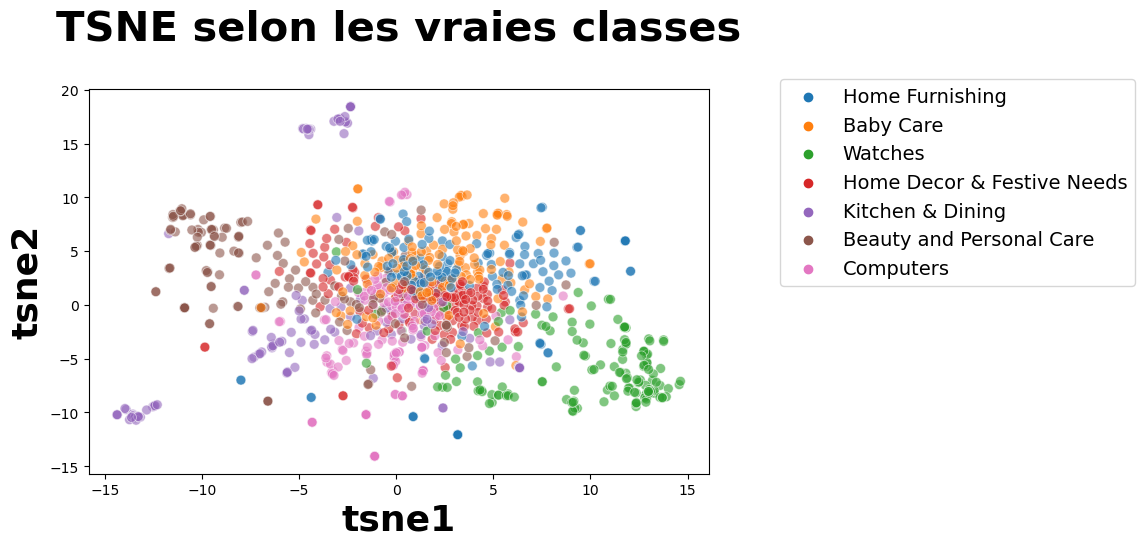

In [84]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14},bbox_to_anchor=(1.1, 1.05)) 

plt.show()

In [85]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


/opt/anaconda3/envs/tf_image/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


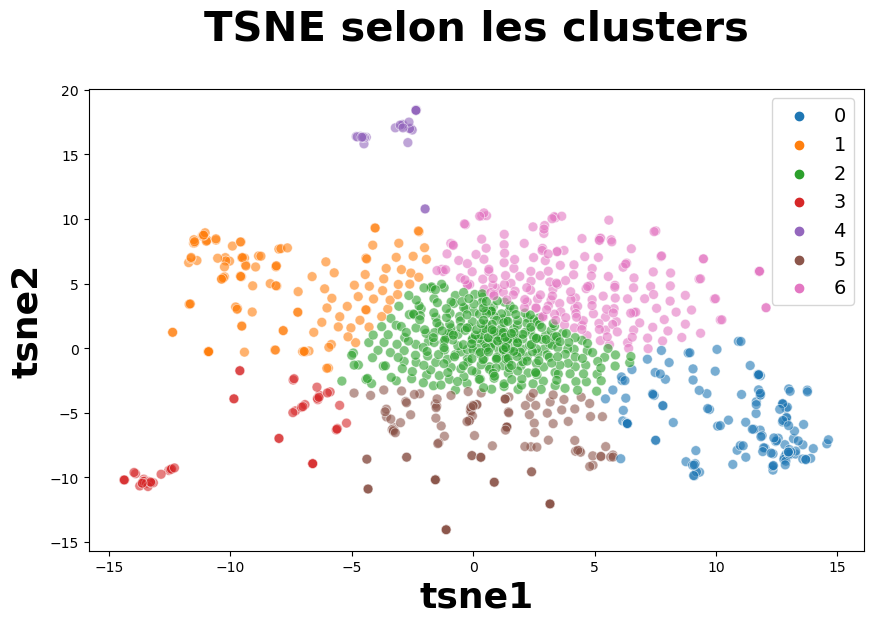

ARI :  0.24012731347620847


In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df_image["category"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

In [88]:
from sklearn.metrics import silhouette_score, homogeneity_score, completeness_score, v_measure_score, fowlkes_mallows_score

# Calcul du Silhouette Score
silhouette = silhouette_score(X_tsne, cls.labels_)

# Calcul de l'homogénéité, de la complétude et de la V-mesure
homogeneity = homogeneity_score(labels, cls.labels_)
completeness = completeness_score(labels, cls.labels_)
v_measure = v_measure_score(labels, cls.labels_)

# Calcul de l'indice de Fowlkes-Mallows
fm_index = fowlkes_mallows_score(labels, cls.labels_)

print(f'Silouette:{silhouette}, homogeneity:{homogeneity},completeness:{completeness},v_measure:{v_measure},fm_index:{fm_index} ')

Silouette:0.3889370262622833, homogeneity:0.356836449825672,completeness:0.39507638730479283,v_measure:0.3749840366971507,fm_index:0.3715712832729228 


In [89]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    133
1    136
2    350
3     58
4     43
5    129
6    201
Name: class, dtype: int64

In [92]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[  1   7  55   0   2   1  84]
 [  0  96  34   5   0   8   7]
 [  2   4  68   0   0  69   7]
 [  6  19 103   2   0   5  15]
 [  6   2  40   2   0  13  87]
 [  5   7  39  49  41   9   0]
 [113   1  11   0   0  24   1]]


In [94]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [0, 3, 4, 2, 1, 6, 5]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [0, 3, 4, 2, 1, 6, 5]
[[  1   2   0   7  55  84   1]
 [  0   0   5  96  34   7   8]
 [  2   0   0   4  68   7  69]
 [  6   0   2  19 103  15   5]
 [  6   0   2   2  40  87  13]
 [  5  41  49   7  39   0   9]
 [113   0   0   1  11   1  24]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       150
           1       0.00      0.00      0.00       150
           2       0.00      0.00      0.00       150
           3       0.14      0.13      0.13       150
           4       0.11      0.27      0.16       150
           5       0.00      0.00      0.00       150
           6       0.19      0.16      0.17       150

    accuracy                           0.08      1050
   macro avg       0.06      0.08      0.07      1050
weighted avg       0.06      0.08      0.07      1050



<AxesSubplot: >

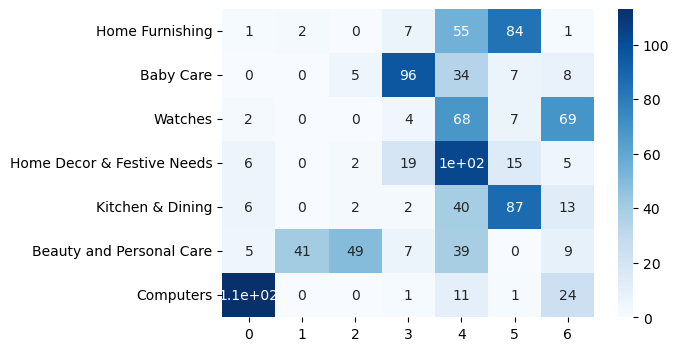

In [95]:
list_labels = ['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers']
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")